# Will an individual get a brain stroke based on their age, glucose levels, hypertension, heart disease, and smoking status?

## Introduction
A stroke is a medical condition where poor blood flow to the brain decreases oxygen and nutrient consumption, resulting in cell death and brain damage. It can be caused by a blood clot or an artery rupture which can lead to health complications such as paralysis and loss of muscle movement (​​Mayo Foundation, 2022). Risk factors for a stroke include hypertension, smoking, diabetes, and other health complications (U.S. Department of Health and Human Services). Preventing the risk of a stroke includes decreasing these risk factors and receiving surgery to clear up the pathways leading to the brain. 
This project aims to predict whether an individual gets a brain stroke based on their age, glucose levels, hypertension, heart disease, and smoking status. A brain stroke prediction dataset with 11 variables consisting of lifestyle factors such as “work type” and health factors such as “hypertension” will be analyzed (Akbasli, 2022). 


## Preliminary Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 8) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
# read the brainstroke csv file into R by downloading/uploading it into Google Drive and using a direct output link
brainstroke_data <- read_csv("https://drive.google.com/uc?export=download&id=1yBiO_qBE9_YBvnEyPe2bazH5ZCOBb1d6")

brainstroke_data

Rows: 4981 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, ever_married, work_type, Residence_type, smoking_status
dbl (6): age, hypertension, heart_disease, avg_glucose_level, bmi, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Male,40,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
Female,45,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
Male,40,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
Female,80,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [3]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 8) 

In [4]:
##cleaning and wrangling data into a tidy format

# changing chr data to categorical data (gender, smoking status, work type, residence type, hypertension, heart disease)
# removing ever_married column
# changed Residence_type and bmi column names
brainstroke_data_v1 <- brainstroke_data |> 
    mutate(across(c(gender, hypertension:Residence_type, smoking_status:stroke),
                  as_factor)) |>
    select(1:4, 6:11)

colnames(brainstroke_data_v1)[6] <- 'residence_type'
colnames(brainstroke_data_v1)[8] <- 'body_mass_index'


# splitting into training/testing data set (75%:25% proportions)
brainstroke_split <- initial_split(brainstroke_data_v1, prop = 0.75, strata = stroke)

brainstroke_training <- training(brainstroke_split)
brainstroke_testing <- testing(brainstroke_split)

brainstroke_training

gender,age,hypertension,heart_disease,work_type,residence_type,avg_glucose_level,body_mass_index,smoking_status,stroke
<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>
Male,67,0,1,Private,Urban,228.69,36.6,formerly smoked,1
Male,80,0,1,Private,Rural,105.92,32.5,never smoked,1
Female,49,0,0,Private,Urban,171.23,34.4,smokes,1
Female,79,1,0,Self-employed,Rural,174.12,24.0,never smoked,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Male,41,0,0,Private,Rural,70.15,29.8,formerly smoked,0
Male,40,0,0,Private,Urban,191.15,31.1,smokes,0
Male,40,0,0,Private,Rural,83.94,30.0,smokes,0
Female,80,1,0,Private,Urban,83.75,29.1,never smoked,0


In [5]:
#FOR FACTOR DATA -  yes (1), no (0) (Variables: hypertension, heart disease, stroke)

In [6]:
##### summaries on training data
# creating objects for number of observations and number of those with/without stroke
total_obs <- nrow(brainstroke_training)
no_stroke_obs <- nrow(filter(brainstroke_training, stroke == 0))
stroke_obs <- nrow(filter(brainstroke_training, stroke == 1))


#####
# Summarized table 1: checking for missing data
not_available <- brainstroke_data_v1 |>
    summarize(across(everything(), ~ sum(is.na(.))))
not_available

# Summarized table 2: stroke counts and proportions
stroke_proportions <- brainstroke_training |>
    group_by(stroke) |>
    summarize(stroke_count = n(),
              percentage = round((stroke_count / total_obs) * 100, 2))
stroke_proportions

# Summarized table 3: average bmi, glucose level, and age of those with/without stroke
stroke_bmi_gluc_age_avg <- brainstroke_training |>
    group_by(stroke) |>
    summarise(avg_bmi = round(mean(body_mass_index), 2),
              avg_glucose = round(mean(avg_glucose_level), 2),
              avg_age = round(mean(age), 2))
stroke_bmi_gluc_age_avg

# Summarized table 4: smoking status counts and proportions between those who have/have not gotten a stroke
smoker_proportions_stroke <- brainstroke_training |>
    group_by(stroke, smoking_status) |>
    summarize(stroke_smoker_count = n(),
              percentage = round((stroke_smoker_count / 
              ifelse(stroke == 0, no_stroke_obs, stroke_obs) * 100), 2)) |>
    distinct()
smoker_proportions_stroke

# Summarized table 5: hypertension counts and proportions between those who have/have not gotten a stroke
hypertension_stroke <- brainstroke_training |>
    mutate(hypertension = ifelse(hypertension == 0, 'No', 'Yes')) |>
    group_by(stroke, hypertension) |>
    summarize(stroke_hypertension_count = n(),
              percentage = round((stroke_hypertension_count / 
              ifelse(stroke == 0, no_stroke_obs, stroke_obs) * 100), 2)) |>
    distinct()
hypertension_stroke

# Summarized table 6: heart disease counts and proportions between those who have/have not gotten a stroke
heart_disease_stroke <- brainstroke_training |>
    mutate(heart_disease = ifelse(heart_disease == 0, 'No', 'Yes')) |>
    group_by(stroke, heart_disease) |>
    summarize(stroke_heartdisease_count = n(),
              percentage = round((stroke_heartdisease_count / 
              ifelse(stroke == 0, no_stroke_obs, stroke_obs) * 100), 2)) |>
    distinct()   
heart_disease_stroke


gender,age,hypertension,heart_disease,work_type,residence_type,avg_glucose_level,body_mass_index,smoking_status,stroke
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0


stroke,stroke_count,percentage
<fct>,<int>,<dbl>
0,3548,94.99
1,187,5.01


stroke,avg_bmi,avg_glucose,avg_age
<fct>,<dbl>,<dbl>,<dbl>
0,28.47,105.17,42.43
1,30.07,130.91,67.58


`summarise()` has grouped output by 'stroke', 'smoking_status'. You can
override using the `.groups` argument.


stroke,smoking_status,stroke_smoker_count,percentage
<fct>,<fct>,<int>,<dbl>
0,formerly smoked,582,16.40
0,never smoked,1324,37.32
0,smokes,558,15.73
0,Unknown,1084,30.55
1,formerly smoked,53,28.34
1,never smoked,66,35.29
1,smokes,33,17.65
1,Unknown,35,18.72


`summarise()` has grouped output by 'stroke', 'hypertension'. You can override
using the `.groups` argument.


stroke,hypertension,stroke_hypertension_count,percentage
<fct>,<chr>,<int>,<dbl>
0,No,3246,91.49
0,Yes,302,8.51
1,No,137,73.26
1,Yes,50,26.74


`summarise()` has grouped output by 'stroke', 'heart_disease'. You can override
using the `.groups` argument.


stroke,heart_disease,stroke_heartdisease_count,percentage
<fct>,<chr>,<int>,<dbl>
0,No,3375,95.12
0,Yes,173,4.88
1,No,147,78.61
1,Yes,40,21.39


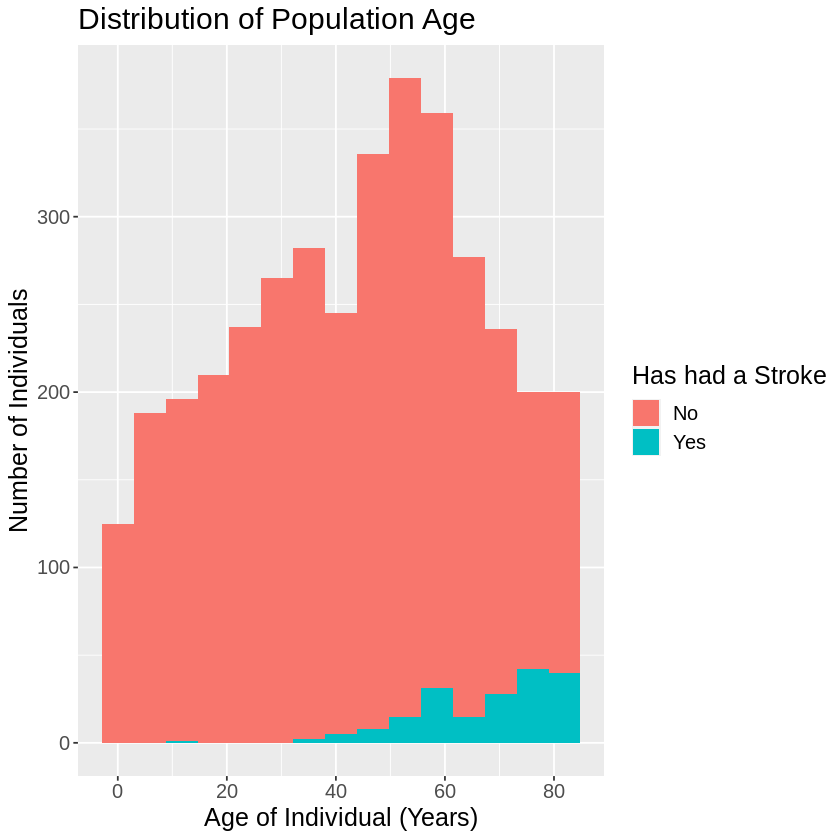

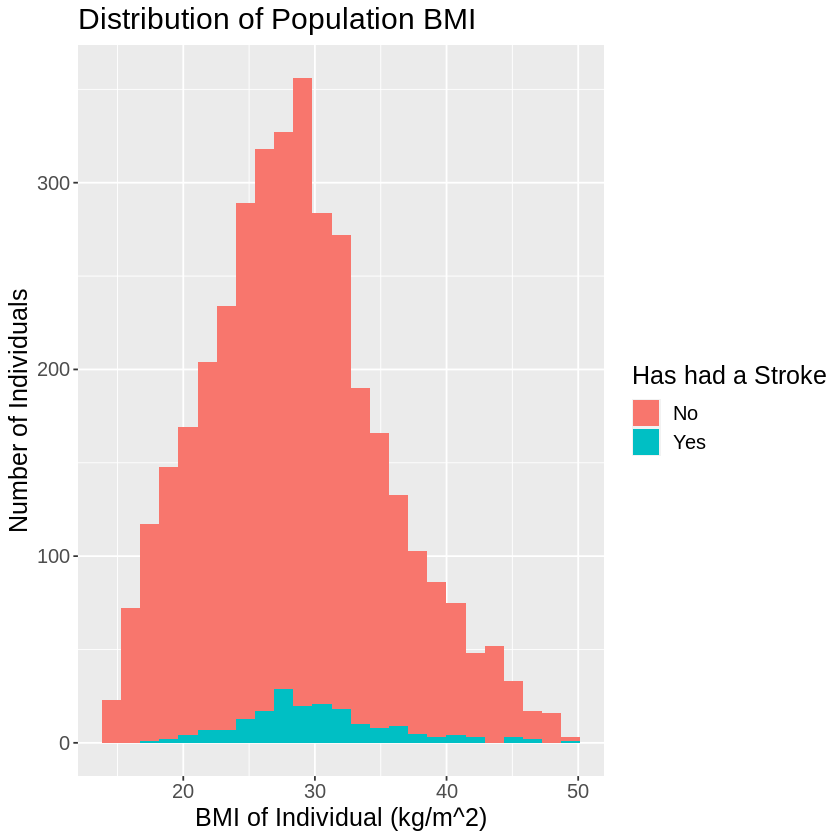

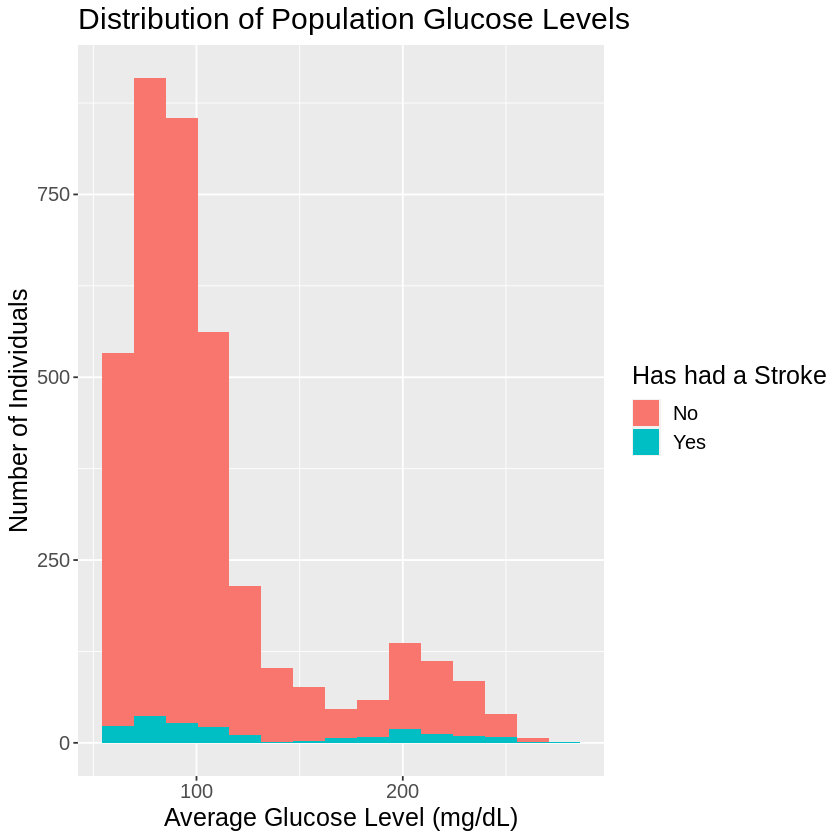

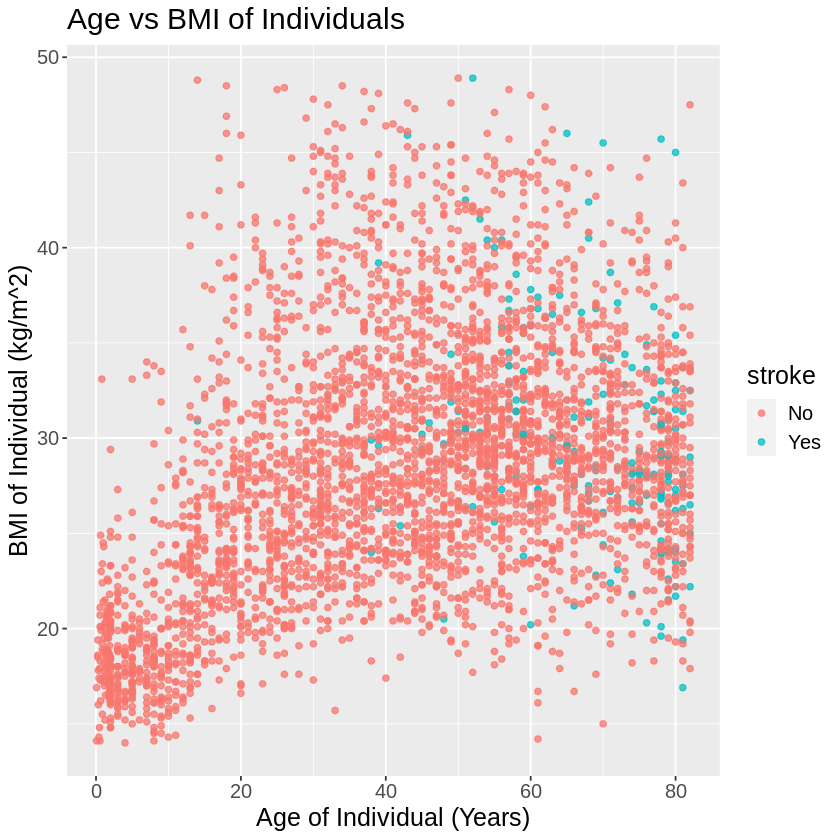

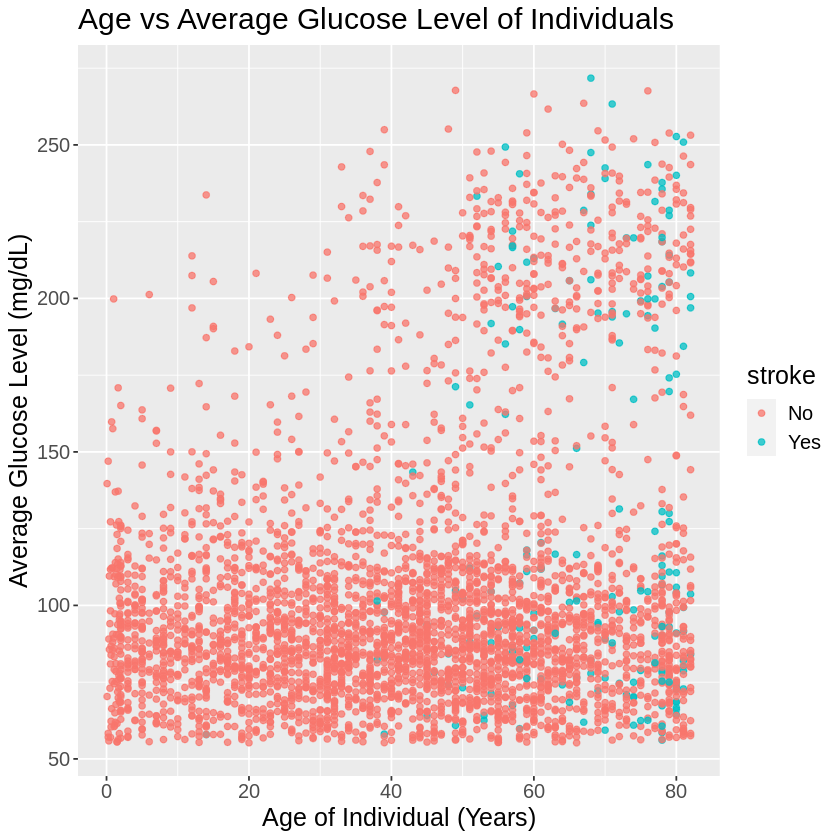

In [7]:
#####Visualizations

histogram_data <- brainstroke_training |>
    mutate(stroke = recode(stroke, '0' = "No", '1' = "Yes"))
    
#histogram 1: distribution of population age
age_histogram_plot <- histogram_data |>
    ggplot(aes(x = age, fill = stroke)) +
    geom_histogram(bins = 15) +
    xlab("Age of Individual (Years)") +
    ylab("Number of Individuals") +
    labs(fill = "Has had a Stroke") +
    ggtitle("Distribution of Population Age") +
    theme(text = element_text(size=15))

age_histogram_plot

#histogram 2: distribution of population BMI
bmi_histogram_plot <- histogram_data |>
    ggplot(aes(x = body_mass_index, fill = stroke)) +
    geom_histogram(bins = 25) +
    xlab("BMI of Individual (kg/m^2)") +
    ylab("Number of Individuals") +
    labs(fill = "Has had a Stroke") +
    ggtitle("Distribution of Population BMI") +
    theme(text = element_text(size=15))

bmi_histogram_plot

#histogram 3: distribution of population glucose levels
glucose_histogram_plot <- histogram_data |>
    ggplot(aes(x = avg_glucose_level, fill = stroke)) +
    geom_histogram(bins = 15) +
    xlab("Average Glucose Level (mg/dL)") +
    ylab("Number of Individuals") +
    labs(fill = "Has had a Stroke") +
    ggtitle("Distribution of Population Glucose Levels") +
    theme(text = element_text(size=15))

glucose_histogram_plot

scatterplot_data <- brainstroke_training |>
    mutate(stroke = recode(stroke, '0' = "No", '1' = "Yes"))

#scatter plot 4: age VS BMI of individuals 
age_bmi_scatterplot <- scatterplot_data |>
    ggplot(aes(x = age, y = body_mass_index, color = stroke)) +
    geom_point(alpha = 0.75) +
    xlab("Age of Individual (Years)") +
    ylab("BMI of Individual (kg/m^2)") +
    ggtitle("Age vs BMI of Individuals") +
    theme(text = element_text(size=15))

age_bmi_scatterplot

#scatter plot 5: age VS glucose level of individuals 
age_glucose_scatterplot <- scatterplot_data |>
    ggplot(aes(x = age, y = avg_glucose_level, color = stroke)) +
    geom_point(alpha = 0.75) +
    xlab("Age of Individual (Years)") +
    ylab("Average Glucose Level (mg/dL)") +
    ggtitle("Age vs Average Glucose Level of Individuals") +
    theme(text = element_text(size=15))

age_glucose_scatterplot

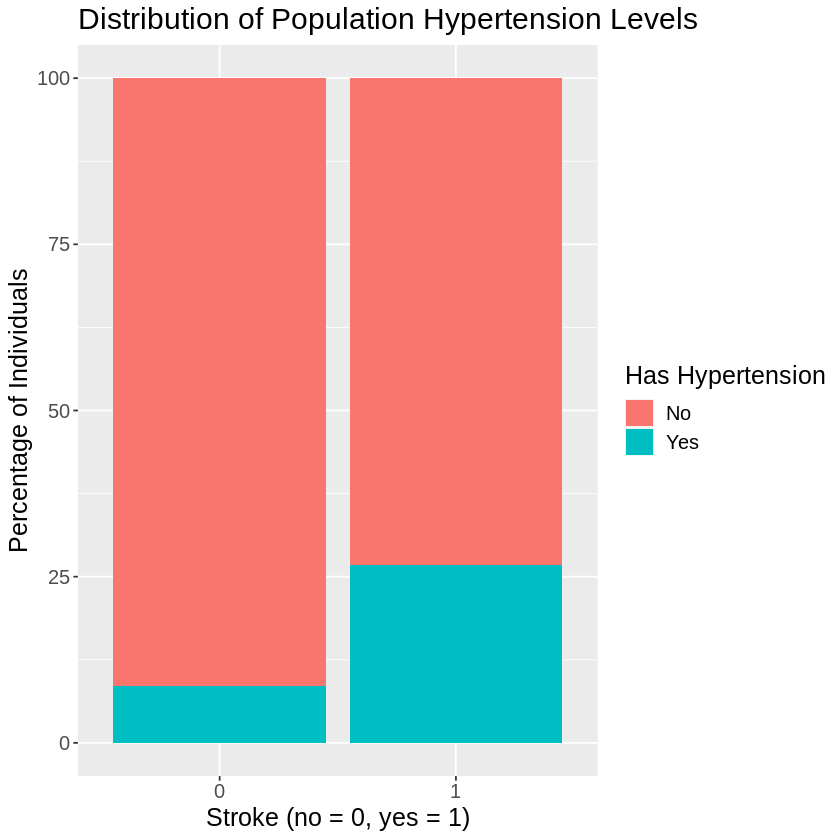

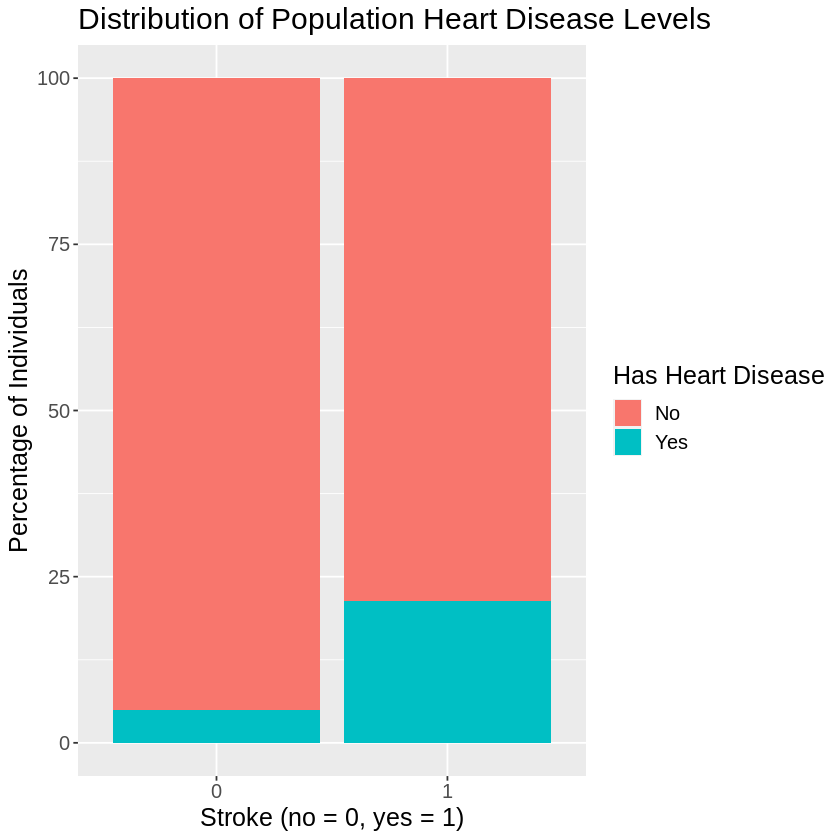

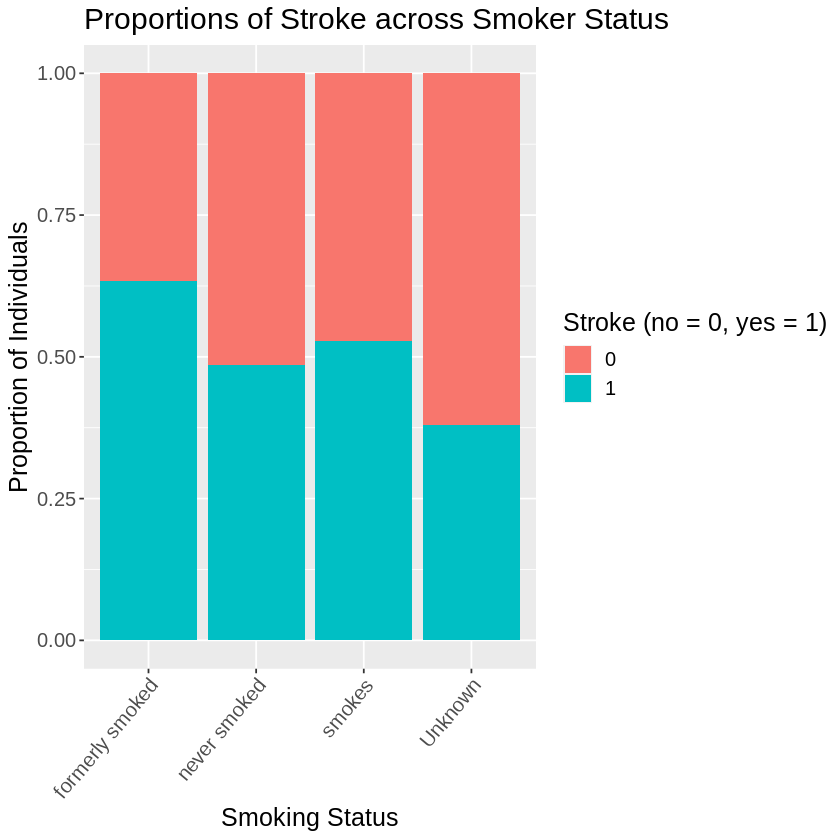

In [8]:
#distribution of population hypertension levels

hypertension_bar_plot <- hypertension_stroke |>
    ggplot(aes(x = stroke, y= percentage, fill = hypertension)) +
    geom_bar(stat = "identity") +
    xlab("Stroke (no = 0, yes = 1)") +
    ylab("Percentage of Individuals") +
    labs(fill = "Has Hypertension") +
    ggtitle("Distribution of Population Hypertension Levels") +
    theme(text = element_text(size=15))

hypertension_bar_plot 

#distribution of population heart disease levels
heartdisease_bar_plot <- heart_disease_stroke |>
    ggplot(aes(x = stroke, y= percentage, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    xlab("Stroke (no = 0, yes = 1)") +
    ylab("Percentage of Individuals") +
    labs(fill = "Has Heart Disease") +
    ggtitle("Distribution of Population Heart Disease Levels") +
    theme(text = element_text(size=15))

heartdisease_bar_plot 

#distribution of population smoker status 
smoking_bar_plot <- smoker_proportions_stroke |>
    ggplot(aes(x = smoking_status, y= percentage, fill = stroke)) +
    geom_bar(stat = "identity", position = "fill") +
    xlab("Smoking Status") +
    ylab("Proportion of Individuals") +
    labs(fill = "Stroke (no = 0, yes = 1)") +
    ggtitle("Proportions of Stroke across Smoker Status") +
    theme(text = element_text(size=15)) + 
    theme(axis.text.x = element_text(angle = 50, hjust = 1))

smoking_bar_plot

## Methods
Data analysis will use the K-nearest neighbours algorithm and the training set will be used to create the classifier. The optimal K-value will be determined by cross-validation. The tables show a class imbalance with the stroke category so we will rebalance the data by oversampling the stroke-positive observations. The data will also be standardized. 
The target variable is the “stroke” column. Based on the plots above, the important predictor variables are age, glucose levels, hypertension, heart disease, and smoking status because there is a trend for predicting stroke. For example, histogram 1 shows older age correlates with increased stroke risk.  Summarized table 3 shows a higher average glucose level for stroke-positive individuals. Variables like BMI show low correlation since there is approximately an equal distribution of individuals who got a stroke regardless of their BMI. The forward selection method will also be used to confirm useful variables for prediction. Then, the classifier will be used to predict the stroke condition in the testing set to determine the accuracy with cross-validation. Once sufficient accuracy is achieved, the label of a new observation can be predicted. 
The results will be visualized with scatter plots using quantitative predictor variables. Training data will be coloured by stroke condition. Diagnosis of the new observation will be labelled in a different colour. Accuracy can be visualized by colouring the area where the classifier makes the classification. The classifier would be most accurate when the real class of the data point matches the colour of the plot background. 


## Expected Outcomes and Significance
We expect to find predictors like age and glucose levels to be strongly correlated with brain stroke. These findings can help people make better lifestyle choices and increase awareness so that treatment and diagnosis for high-risk individuals are improved.  A future question from our project is how to quantify stroke risk based on health and lifestyle factors. Based on relevant predictors, future studies can explore treatments that decrease the risk of getting a stroke. 

## References
Akbasli, I. T. (2022, July 16). Brain stroke prediction dataset. Kaggle. Retrieved March 11, 2023, from https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset?select=full_data.csv 

Mayo Foundation for Medical Education and Research. (2022, January 20). Stroke. Mayo Clinic. Retrieved March 11, 2023, from https://www.mayoclinic.org/diseases-conditions/stroke/symptoms-causes/syc-20350113#:~:text=A%20stroke%20can%20sometimes%20cause,or%20loss%20of%20muscle%20movement. 

U.S. Department of Health and Human Services. (n.d.). Brain basics: Preventing stroke. National Institute of Neurological Disorders and Stroke. Retrieved March 11, 2023, from https://www.ninds.nih.gov/health-information/public-education/brain-basics/brain-basics-preventing-stroke 
